<a href="https://colab.research.google.com/github/kwon0136/Python/blob/master/190225/test7_Merging%26Join__corrcoef(%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Merging & Join

# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)
#

In [0]:
import pandas as pd
import numpy as np

left = pd.DataFrame({'id':[1,2,3,4,5], 'Name':['Alex','Amy','Allen','ALice','Ayoung'], 'subject_id':['sub1','sub2','sub4','sub6','sub5']})
left
right = pd.DataFrame({'id':[1,2,3,4,5], 'Name':['Alex2','Amy2','Allen2','ALice2','Ayoung2'], 'subject_id':['sub2','sub4','sub3','sub6','sub5']})
right

pd.merge(left, right, on='id') # id 기준으로 merge
pd.merge(left, right, on=['id','subject_id']) # id, subject_id 기준으로 merge
pd.merge(left, right, on='subject_id', how='left') # left outer join
pd.merge(left, right, on='subject_id', how='right') # right outer join
pd.merge(left, right, on='subject_id', how='outer') # full outer join
pd.merge(left, right, on='subject_id', how='inner') # inner join --> default


,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Alex2
1,3,Allen,sub4,2,Amy2
2,4,ALice,sub6,4,ALice2
3,5,Ayoung,sub5,5,Ayoung2


In [0]:
pop_seoul = pd.read_excel("../Data/population_Seoul.xls", header=2, usecols='B,D,G,J,N', encoding='utf-8')
cctv_seoul = pd.read_csv("../Data/CCTV_Seoul.csv", encoding='utf-8')
pop_seoul.rename(columns={pop_seoul.columns[0]:'구별',pop_seoul.columns[1]:'인구수',pop_seoul.columns[2]:'한국인',pop_seoul.columns[3]:'외국인',pop_seoul.columns[4]:'고령자'}, inplace=True)
cctv_seoul.rename(columns={cctv_seoul.columns[0]:'구별'}, inplace=True)
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수']*100 # 외국인비율 column 추가
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수']*100 # 고령자비율 column 추가
#pop_seoul.drop([26], inplace=True) # 공백값 가지는 row 삭제(26) // 삭제 후 재실행--> error
pop_seoul.drop([0],inplace=True)
pop_seoul
cctv_seoul

data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
5,광진구,707,573,78,53,174,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849
6,구로구,1561,1142,173,246,323,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
7,금천구,1015,674,51,269,354,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
8,노원구,1265,542,57,451,516,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
9,도봉구,485,238,159,42,386,348646.0,346629.0,2017.0,51312.0,0.578524,14.717507


In [0]:
cctv_seoul.head()
cctv_seoul['최근증가율']= (cctv_seoul['2014년'] + cctv_seoul['2015년'] + cctv_seoul['2016년']) / cctv_seoul['2013년도 이전'] *100
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


In [0]:
data_result2 = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result2.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [0]:
#del data_result2['2013년도 이전']
#del data_result2['2014년']
#del data_result2['2015년']
#del data_result2['2016년']

In [0]:
data_result2.head()
data_result2.reset_index()

## 상관계수
# corrcoef
# 음의방향 // 양의방향 // 1에 가까울수록 연관성 높다는 의미

np.corrcoef(data_result2['고령자비율'],data_result2['소계'])
np.corrcoef(data_result2['외국인비율'],data_result2['소계'])
np.corrcoef(data_result2['인구수'],data_result2['소계'])


array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

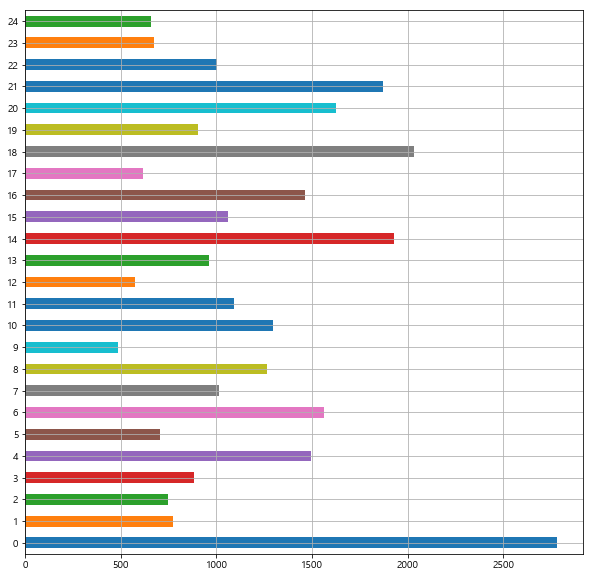

In [0]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib.pyplot as plt
data_result2['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

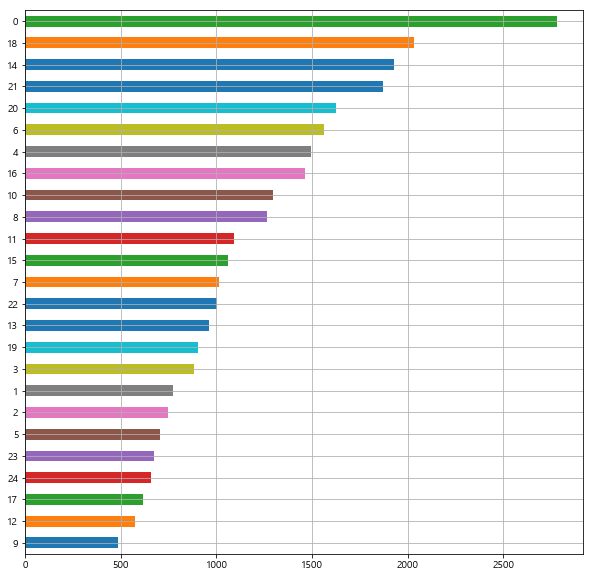

In [0]:
data_result2['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

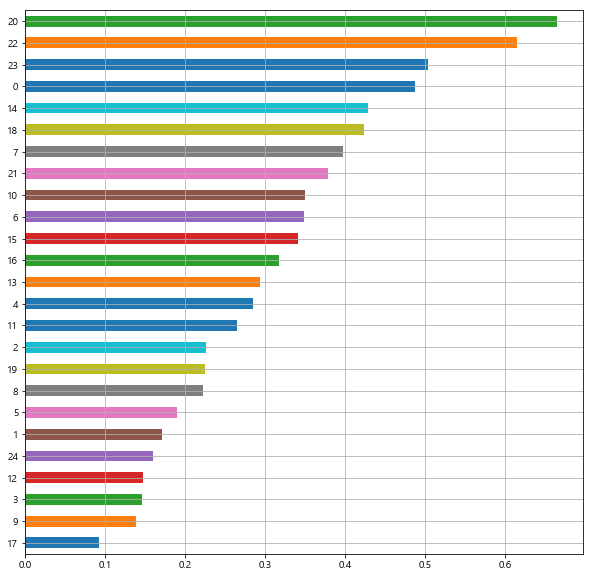

In [0]:
data_result2['CCTV비율'] = data_result2['소계']/data_result2['인구수']*100
data_result2

data_result2['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

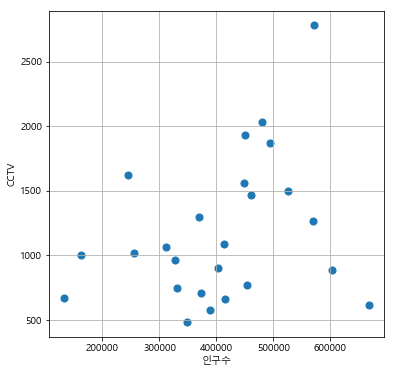

In [0]:
plt.figure(figsize=(6,6))
plt.scatter(data_result2['인구수'], data_result2['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()